In [1]:
import Models.SIRD as sird
import Models.SIRD_Time as sird_time
import Models.SIRD_Beta_Time as sird_beta

import Models.SAIRD as saird
import Models.SAIRD_Time as saird_time

import Models.SAIRD_Feedback as saird_fb

import Models.SIRD_Feedback as sird_fb
import Models.SIRD_Feedback_Delay as sird_fd

import Models.process as process

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [2]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "CA.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

#recovRaw = process.getRecov(infectRaw, deadRaw)
#infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 60000000

skipDays = 35
numDays = len(infectRaw) - 30 #just to get initial beginning data
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

daysToPredict = 150

## SIRD and SIRD time varying model

In [3]:
sird.weightDecay = .99
sird.regularizer = 10

In [4]:
q = sird.getQ(infect,recov, dead, pop)
print("q =", q)

#q=.011
suscept = process.getSuscept(infect,recov,dead, q,pop)

q = 0.2840245731666667


[0.032046627232759015, 0.033826074343996225, 0.0007638388855368726]


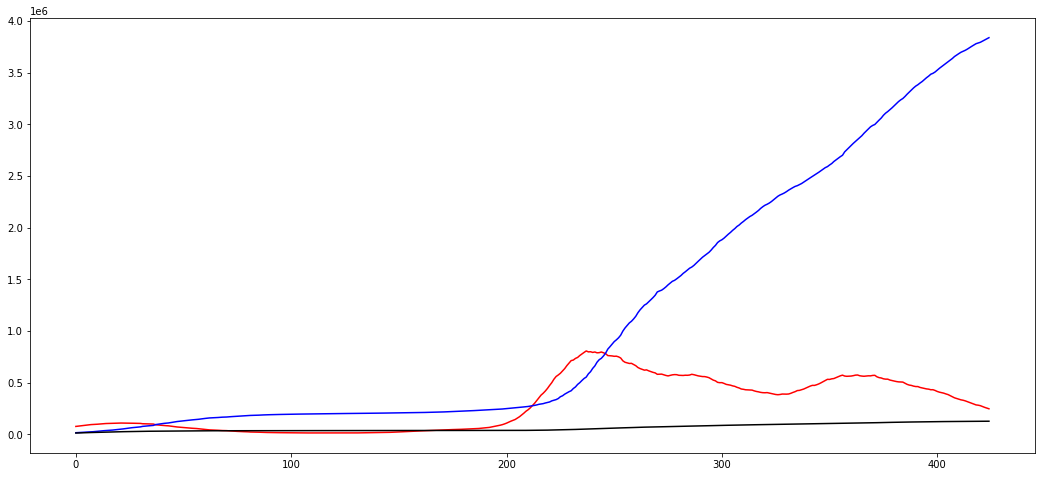

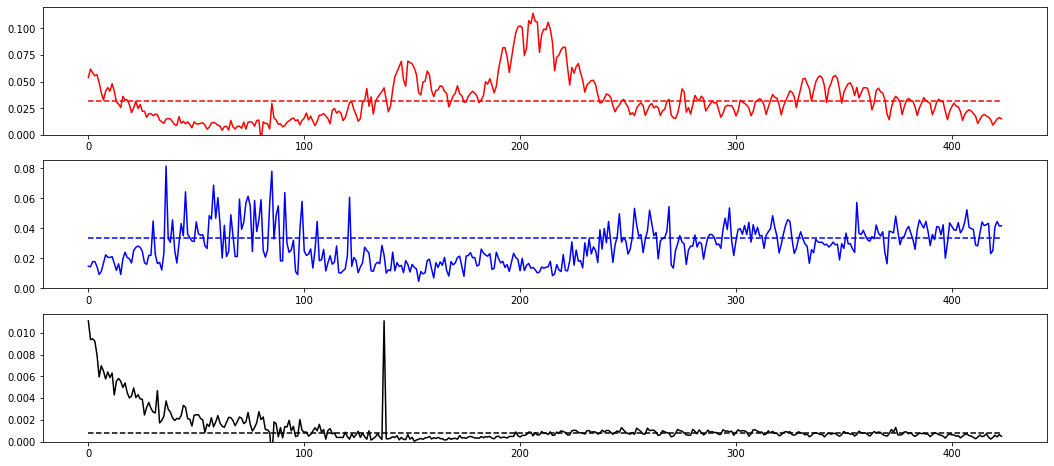

In [5]:
fig,ax = sird.displayData(suscept, infect, recov, dead, graphVals=[0,1,1,1])

linVars = sird.getLinVars(suscept, infect, recov, dead)
print(linVars)

linVarsTime, fig, ax = sird_time.getLinVars(suscept, infect, recov, dead, graph=True)

ax[0].plot(np.ones(len(linVarsTime[:,0]))*linVars[0], color="red", linestyle="dashed")
ax[1].plot(np.ones(len(linVarsTime[:,1]))*linVars[1], color="blue", linestyle="dashed")
ax[2].plot(np.ones(len(linVarsTime[:,2]))*linVars[2], color="black", linestyle="dashed")

Lin Vars: [0.01900041 0.02658656 0.00090832]
Lin Vars: [0.035203731790970375, 0.03020972348586537, 0.0008910851609458601]


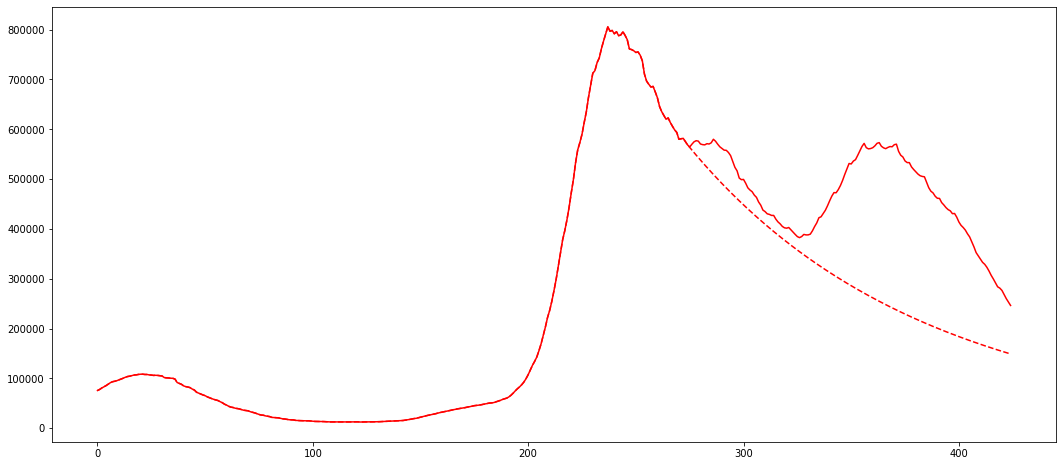

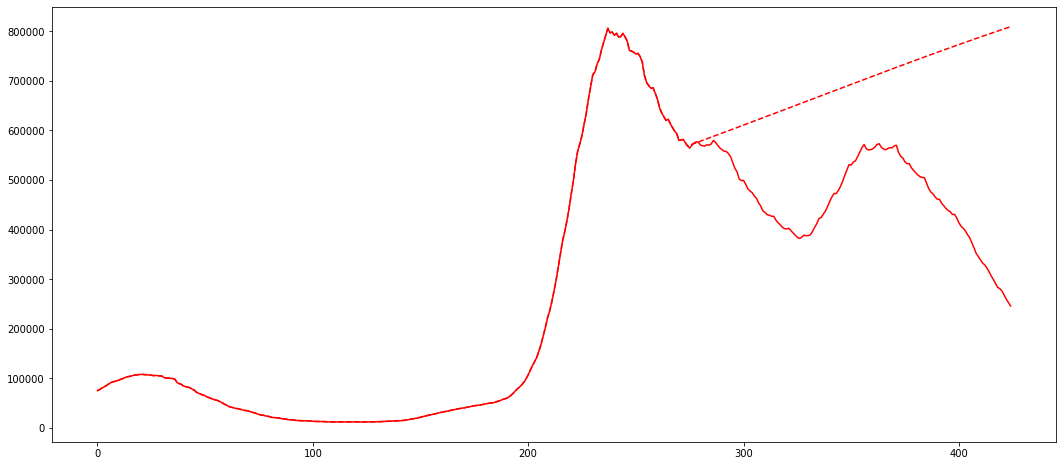

In [6]:
#daysToPredict = 90
sird_time.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);
sird.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

## SIRD Beta time varying

Same as SIRD but Beta is time varying while gamma and nu are constant

In [7]:
sird_beta.weightDecay = .99
sird_beta.regularizer = 10

In [8]:
q = sird_beta.getQ(infect,recov, dead, pop, resol=100)
print("q =", q)

q = 0.2840245731666667


In [9]:
#q=.011
suscept = process.getSuscept(infect,recov,dead, q,pop)

[0.032046627232759015, 0.033826074343996225, 0.0007638388855368726]


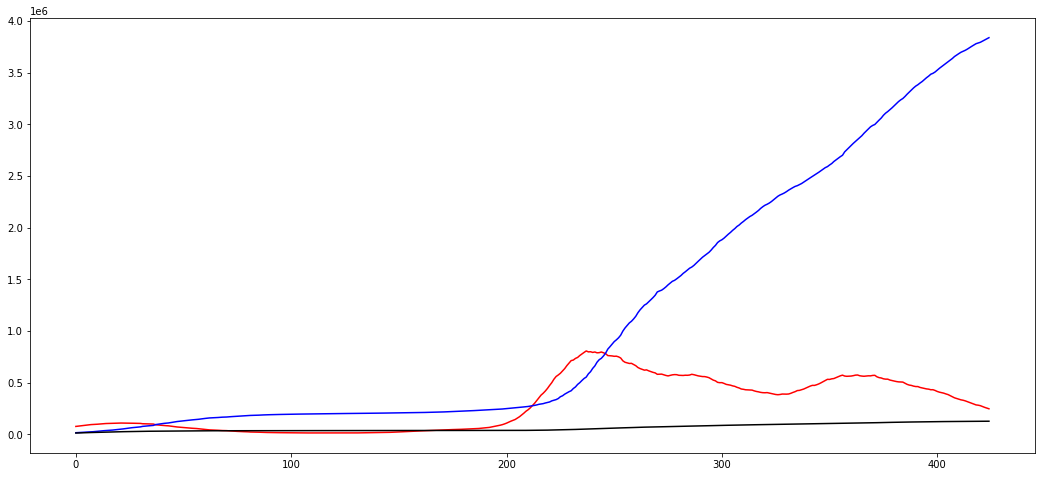

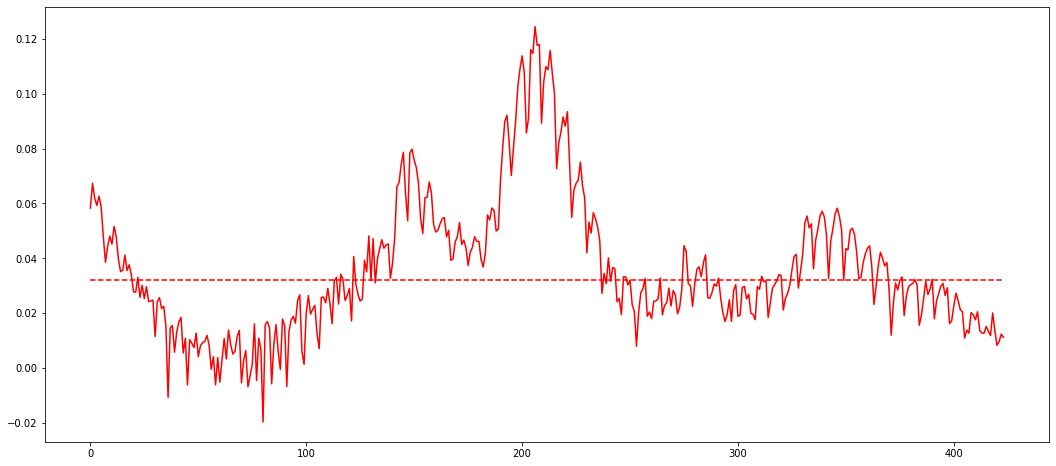

In [10]:
fig,ax = sird_beta.displayData(suscept, infect, recov, dead, graphVals=[0,1,1,1])

linVars = sird.getLinVars(suscept, infect, recov, dead)
print(linVars)

linVarsTime, fig, ax = sird_beta.getLinVars(suscept, infect, recov, dead, graph=True)

ax.plot(np.ones(len(linVarsTime[0]))*linVars[0], color="red", linestyle="dashed")

Lin Vars: [0.02087277959448114, 0.03020972348586537, 0.0008910851609458601]


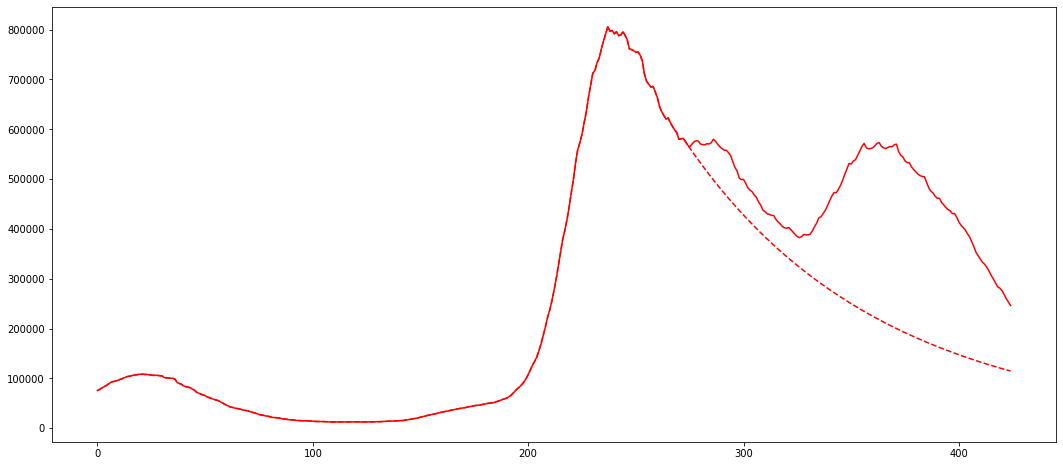

In [11]:
#daysToPredict = 90
sird_beta.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

## SAIRD and SAIRD time model

In [12]:
saird.weightDecay = .99
saird.regularizer = 10

In [13]:
asymptRaw = saird.getAsympt(infectRaw, recovRaw, deadRaw, shift=21)

asympt = asymptRaw[skipDays:numDays]

In [14]:
q = saird.getQ(asympt,infect,recov, dead, pop)
print("q =", q)

#q=.24
suscept = saird.getSuscept(asympt,infect,recov,dead, q,pop)

q = 0.2840245731666667


[0.04642062331828438, 0.043079003774069674, 0.033826074343996225, 0.0007638388855368726]


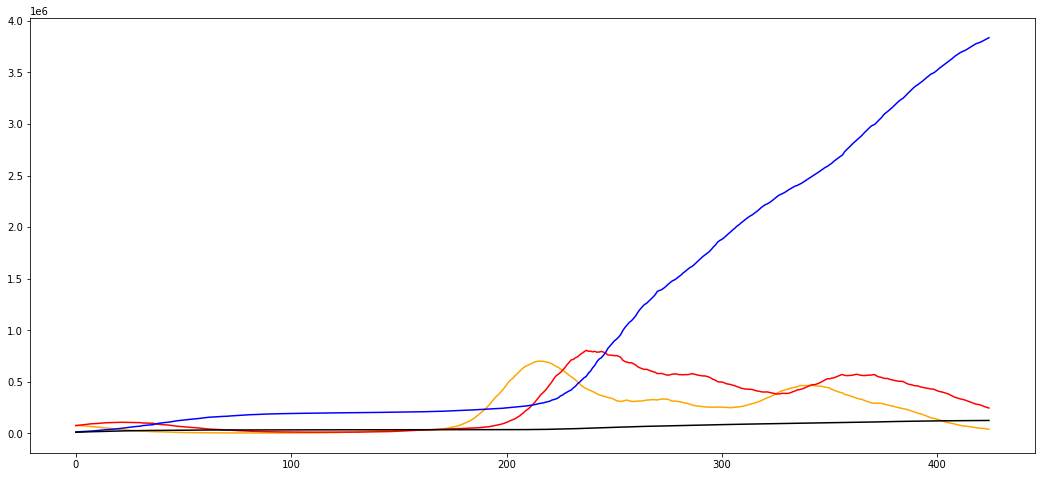

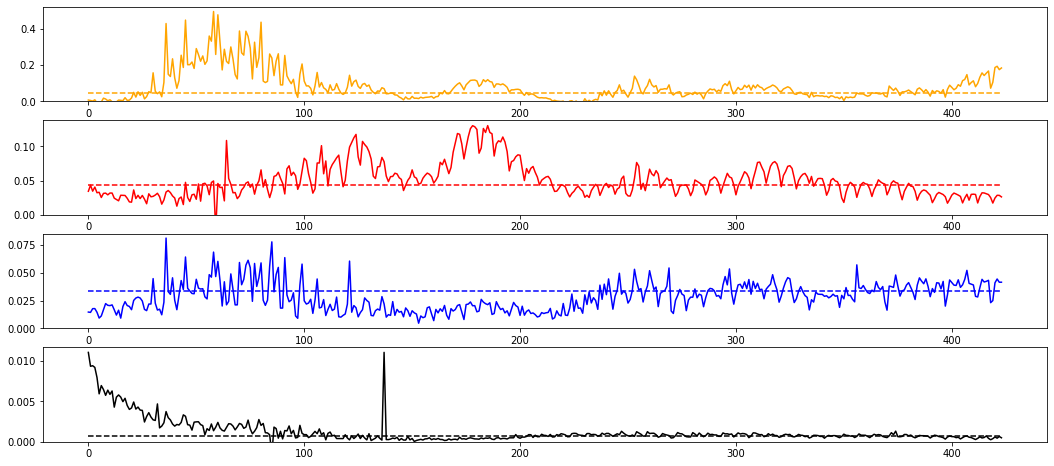

In [15]:
fig,ax = saird.displayData(suscept, asympt, infect, recov, dead, graphVals=[0,1,1,1,1])

linVars = saird.getLinVars(suscept, asympt, infect, recov, dead)
print(linVars)

linVarsTime, fig, ax = saird_time.getLinVars(suscept, asympt, infect, recov, dead, graph=True)

ax[0].plot(np.ones(len(linVarsTime[:,0]))*linVars[0], color="orange", linestyle="dashed")
ax[1].plot(np.ones(len(linVarsTime[:,1]))*linVars[1], color="red", linestyle="dashed")
ax[2].plot(np.ones(len(linVarsTime[:,2]))*linVars[2], color="blue", linestyle="dashed")
ax[3].plot(np.ones(len(linVarsTime[:,3]))*linVars[3], color="black", linestyle="dashed")

Lin Vars: [0.04934841 0.03409155 0.02658656 0.00090832]
Lin Vars: [0.04885811492013388, 0.03305620450863469, 0.03020972348586537, 0.0008910851609458601]


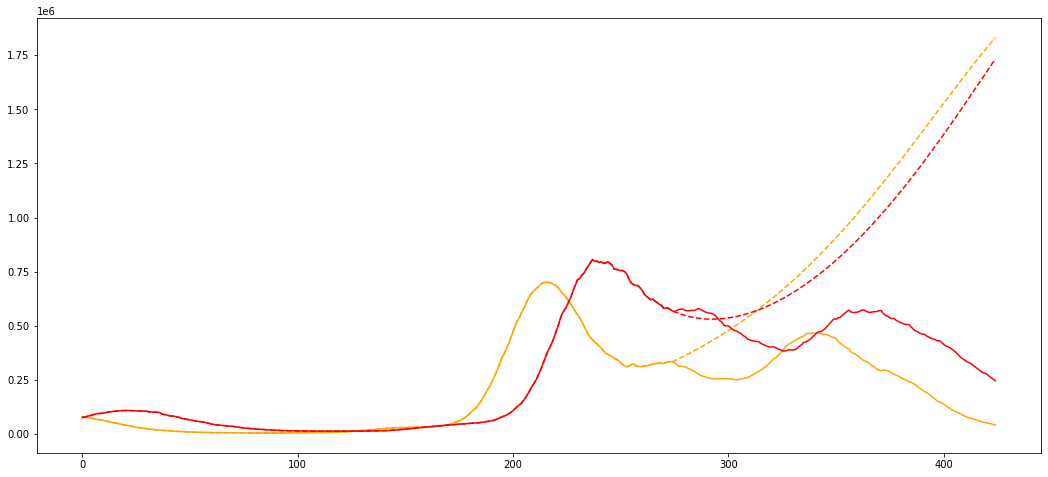

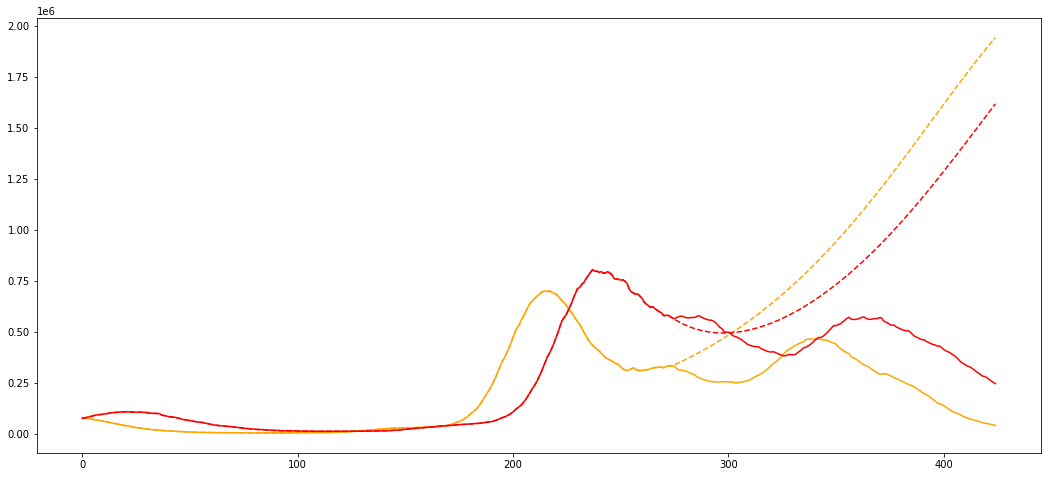

In [16]:
#daysToPredict = 40
saird_time.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);
saird.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

## SAIRD Feedback
Instead of using SI/S+I, we are using SA/S+A (so the assumption is that asyptomatic are the ones responsible for the spread). This essentially makes the SAIRD Feedback very close to the SIRD Feedback delay

In [38]:
saird_fb.weightDecay = .94
saird_fb.regularizer = 10
saird_fb.betaUseDecay = True #no weight decay when solving beta vars

In [39]:
shiftDays = 21
asymptRaw = saird.getAsympt(infectRaw, recovRaw, deadRaw, shift=shiftDays)
asympt = asymptRaw[skipDays:numDays]

In [40]:
q = saird.getQ(infect, asympt, recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.24
suscept = saird.getSuscept(infect,asympt,recov,dead, q,pop)

q = 0.28139277733333334


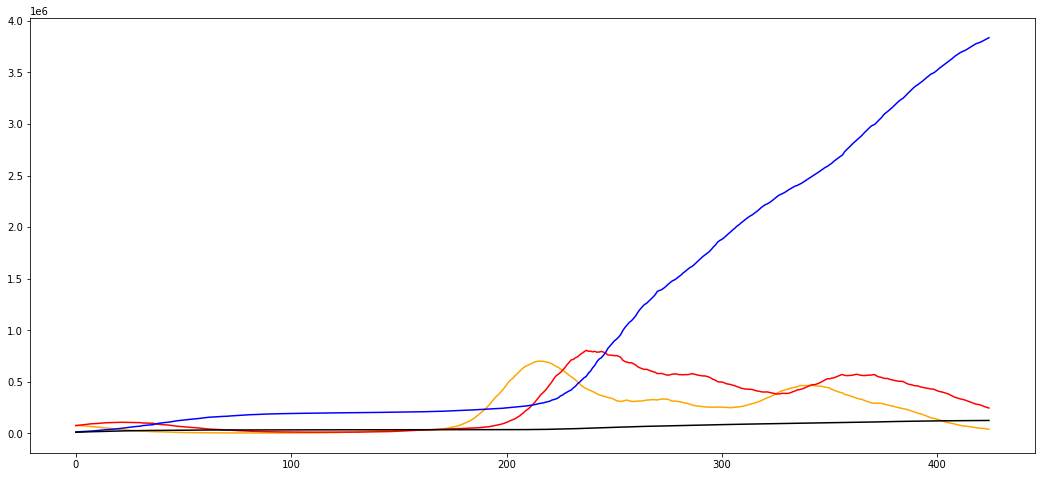

In [41]:
fig,ax = saird_fb.displayData(suscept, asympt, infect, recov, dead, graphVals=[0,1,1,1,1])

In [42]:
b1Range = (0, 5000)
b2Range = (1, 5)

betaVarsResol = [100, 5]

linVars, nonLinVars = saird_fb.solveAllVars(suscept,asympt,infect,recov,dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  0.04270108738229969
b1:  0.042701087382299684
k:   0.06588492491780992
g:   0.037655532462795474
nu:  0.0005898850158263767
b2:  0
b3:  1
cost:  3829356.579597673



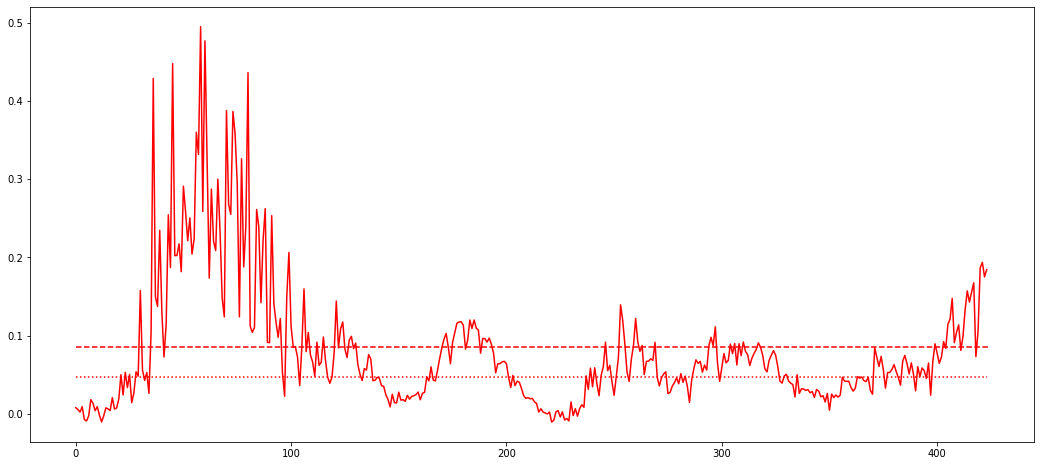

In [43]:
betaTime = saird_fb.getBetaTime(suscept, asympt, infect, recov, dead, linVars, nonLinVars)
linVarsTime = saird_time.getLinVars(suscept, asympt, infect, recov, dead)
linVarsConst = saird.getLinVars(suscept, asympt, infect, recov, dead)

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="red", linestyle="dotted") #constant beta
ax.plot(betaTime, color="red", linestyle="dashed") #feedback beta
ax.plot(linVarsTime[:,0], color="red") #time varying beta

Lin Vars: [0.0488738157404385, 0.03305620450863469, 0.03020972348586537, 0.0008910851609458601]
Non Lin Vars: [0, 1]
Lin Vars: [0.04270108738229969, 0.042701087382299684, 0.06588492491780992, 0.037655532462795474, 0.0005898850158263767]
Non Lin Vars: [200.0, 6.0]
Lin Vars: [0.06567326370900979, 0.03541963617628211, 0.05197978938619482, 0.03214856304522357, 0.000869831139074888]


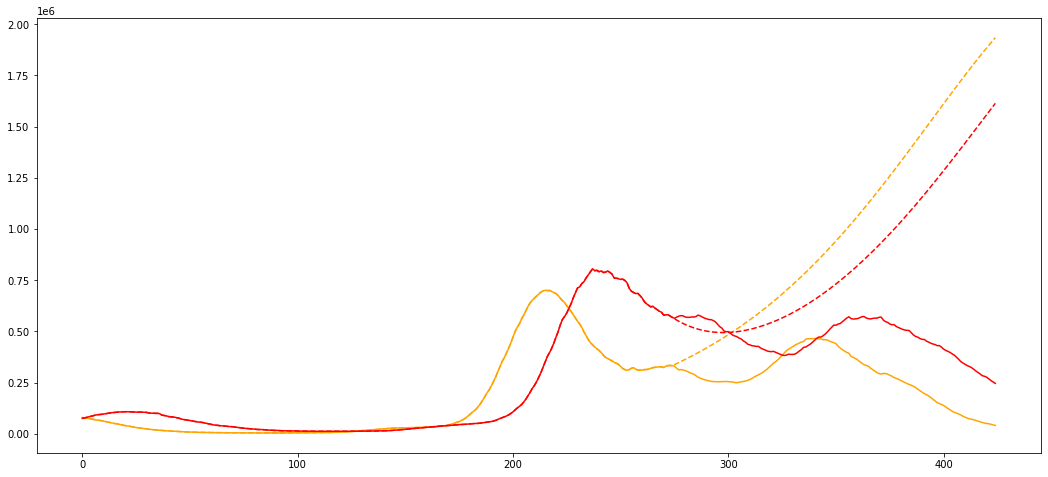

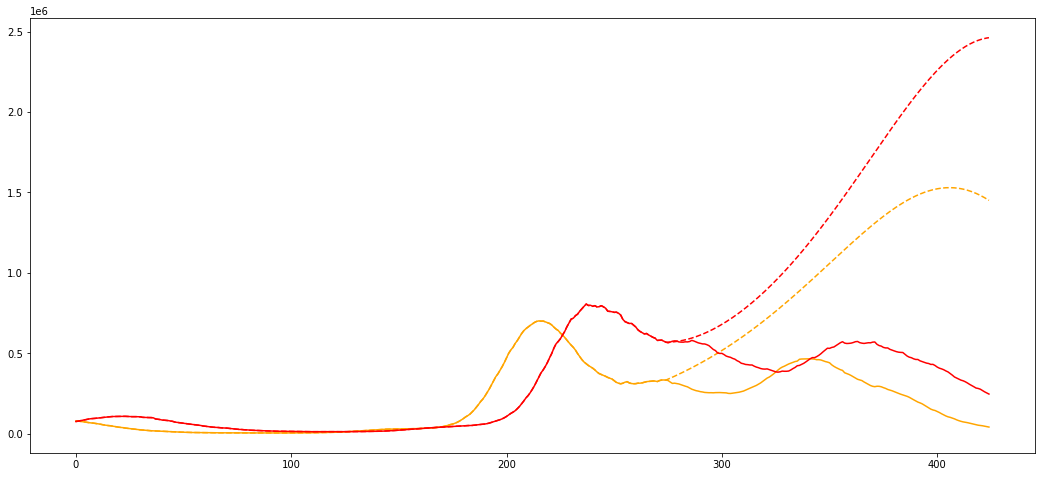

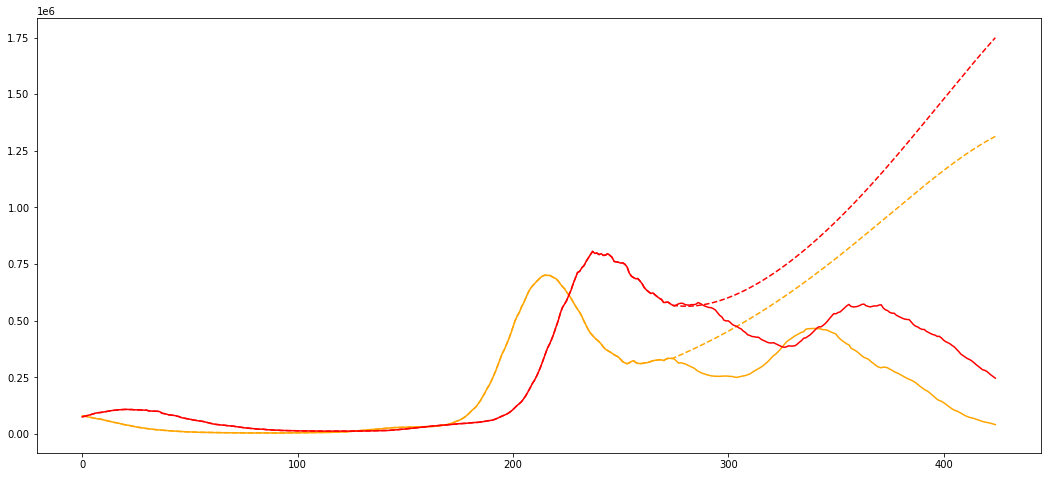

In [44]:
#daysToPredict = 180
saird.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

#note using the nonLinVars is trained on the whole data includinig the predicted days
saird_fb.predictMatch(suscept,asympt,infect,recov,dead, daysToPredict, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,1,0,0]);

#only train nonLinVars on the non predicted days only
saird_fb.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

## SIRD Feedback (no delay)

In [24]:
sird_fb.weightDecay = .99
sird_fb.regularizer = 10
sird_fb.betaUseDecay = False #no weight decay when solving beta vars

In [25]:
q = sird.getQ(infect,recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.011
suscept = process.getSuscept(infect,recov,dead, q,pop)

q = 0.2840245731666667


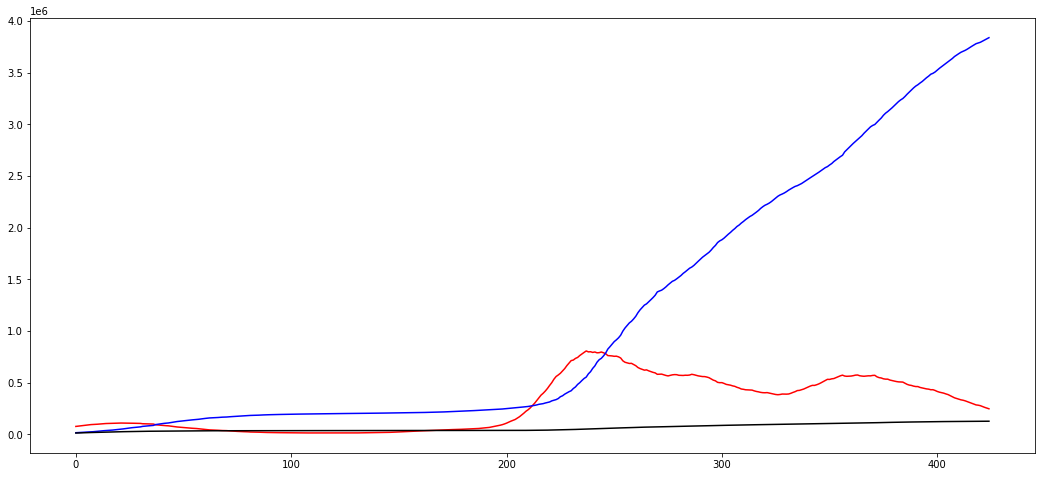

In [26]:
fig,ax = sird_fb.displayData(suscept, infect, recov, dead, graphVals=[0,1,1,1])

In [27]:
b1Range = (0, 5000)
b2Range = (1, 5)

betaVarsResol = [100, 5]

linVars, nonLinVars = sird_fb.solveAllVars(suscept, infect, recov, dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  0.035192315821827816
b1:  0.009217396270670456
g:   0.033826074343996225
nu:  0.0007638388855368726
b2:  150.0
b3:  4.6
cost:  24107445.128771134



In [28]:
sirdLinVars = sird.getLinVars(suscept, infect, recov, dead)
print("cost: ", sird.getError(suscept, infect, recov, dead, sirdLinVars))

cost:  23227795.503585555


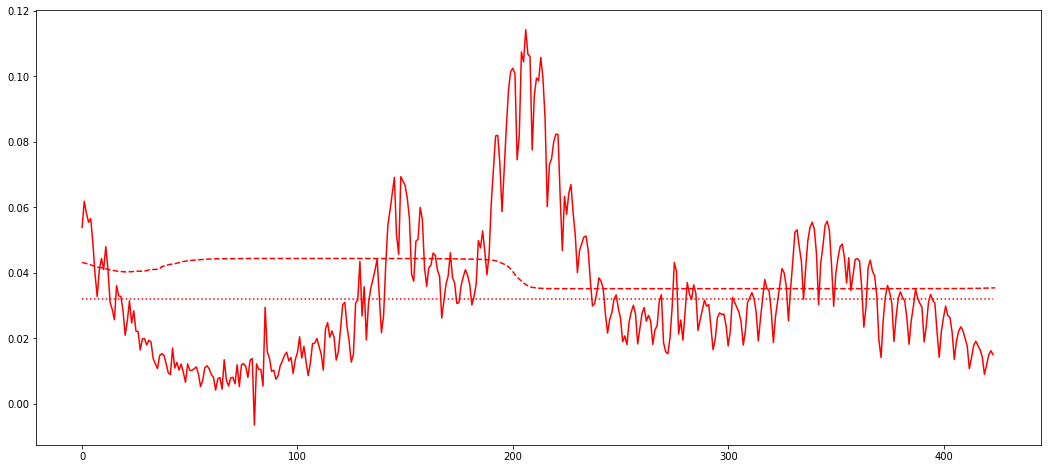

In [29]:
betaTime = sird_fb.getBetaTime(suscept, infect, recov, dead, linVars, nonLinVars)
linVarsTime = sird_time.getLinVars(suscept, infect, recov, dead)
linVarsConst = sird.getLinVars(suscept, infect, recov, dead)


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="red", linestyle="dotted") #constant beta
ax.plot(betaTime, color="red", linestyle="dashed") #feedback beta
ax.plot(linVarsTime[:,0], color="red") #time varying beta

Lin Vars: [0.035203731790970375, 0.03020972348586537, 0.0008910851609458601]
Non Lin Vars: [50.0, 4.0]
Lin Vars: [0.032617274954660366, 0.04718222018280536, 0.03020972348586537, 0.0008910851609458601]


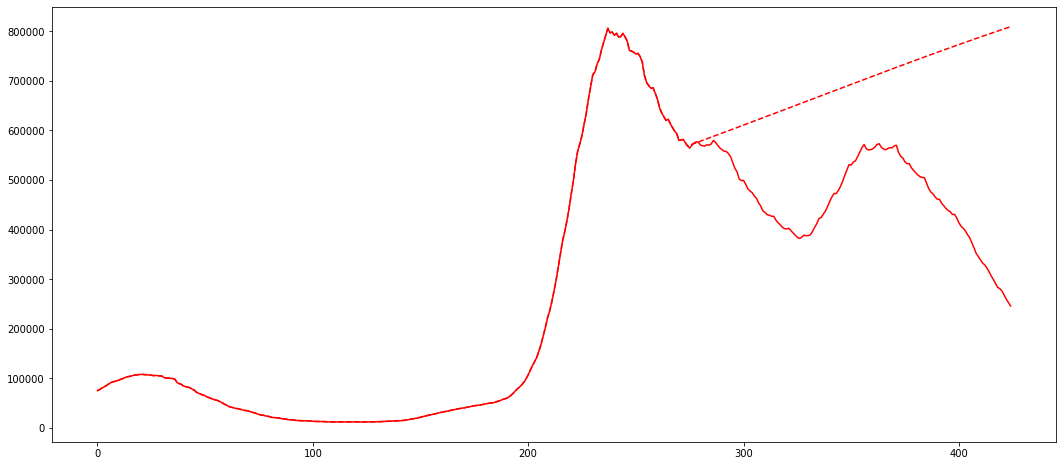

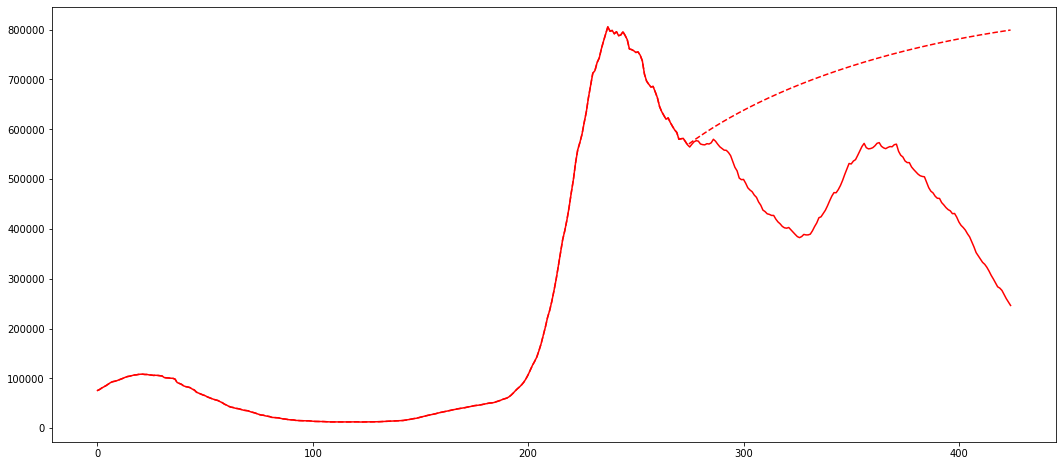

In [30]:
#daysToPredict = 100
sird.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);
sird_fb.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

## SIRD Feedback with delay

In [31]:
sird_fd.weightDecay = .97 #very small amount of decay
sird_fd.regularizer = 10
sird_fd.betaUseDecay = True

sird_fd.delay = 21

In [32]:
q = sird.getQ(infect,recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.011
suscept = process.getSuscept(infect,recov,dead, q,pop)

q = 0.2840245731666667


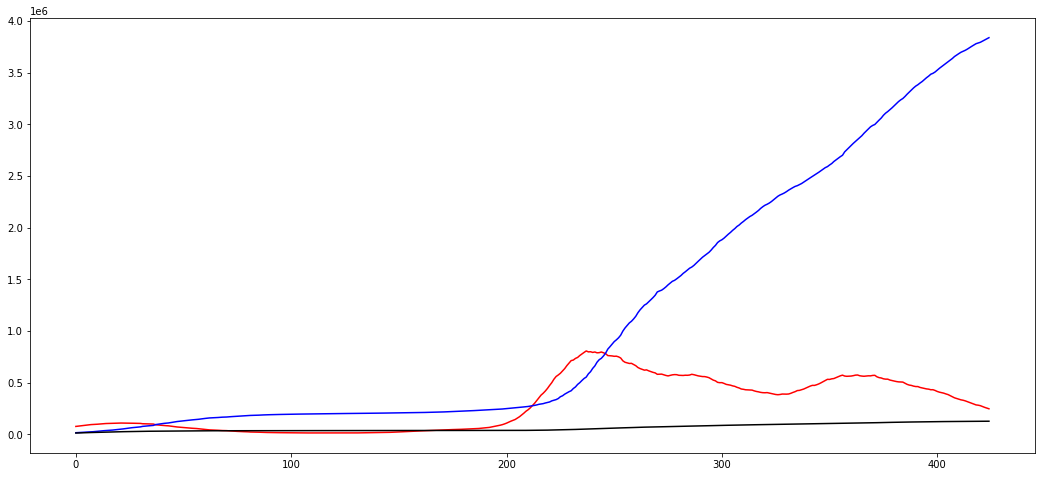

In [33]:
fig,ax = sird_fd.displayData(suscept, infect, recov, dead, graphVals=[0,1,1,1])

In [34]:
b1Range = (0, 5000)
b2Range = (1, 5)

betaVarsResol = [100, 5]

linVars, nonLinVars = sird_fd.solveAllVars(suscept, infect, recov, dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  0.022990674818894923
b1:  0.09450586668858234
g:   0.03621509872757817
nu:  0.000667152584454873
b2:  100.0
b3:  2.8
cost:  4059200.5490919244



In [35]:
sirdLinVars = sird.getLinVars(suscept, infect, recov, dead)

print("cost: ", sird.getError(suscept, infect, recov, dead, sirdLinVars))

cost:  23227795.503585555


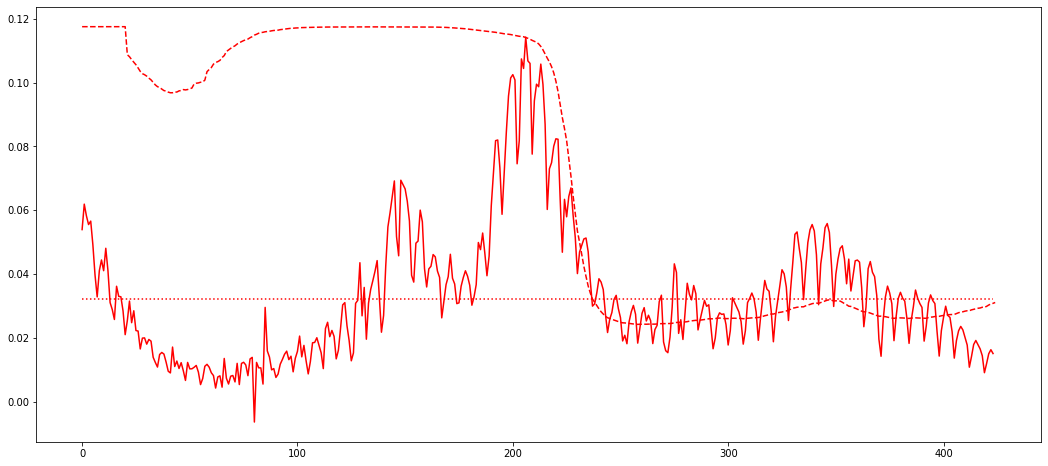

In [36]:
betaTime = sird_fd.getBetaTime(suscept, infect, recov, dead, linVars, nonLinVars)
linVarsTime = sird_time.getLinVars(suscept, infect, recov, dead)
linVarsConst = sird.getLinVars(suscept, infect, recov, dead)


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="red", linestyle="dotted") #constant beta
ax.plot(betaTime, color="red", linestyle="dashed") #feedback beta
ax.plot(linVarsTime[:,0], color="red") #time varying beta

Lin Vars: [0.035203731790970375, 0.03020972348586537, 0.0008910851609458601]
Non Lin Vars: [100.0, 2.8]
Lin Vars: [0.022990674818894923, 0.09450586668858234, 0.03621509872757817, 0.000667152584454873]
Non Lin Vars: [150.0, 1.0]
Lin Vars: [0.0037351356965007335, 0.14766693295246078, 0.03137136265675651, 0.0008820512874055479]


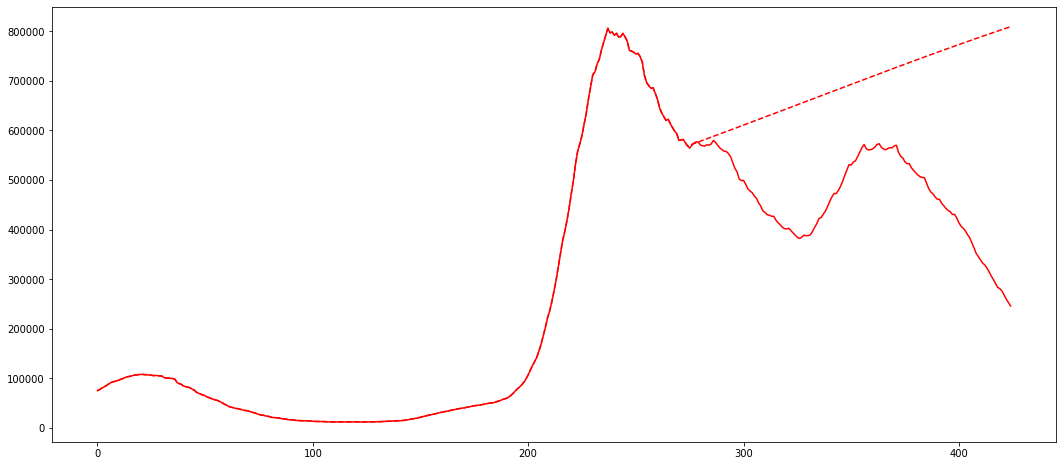

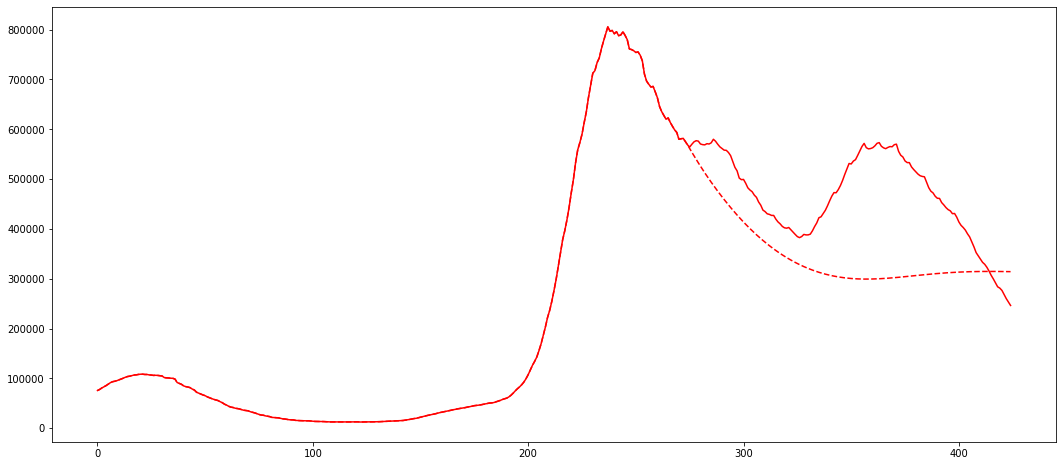

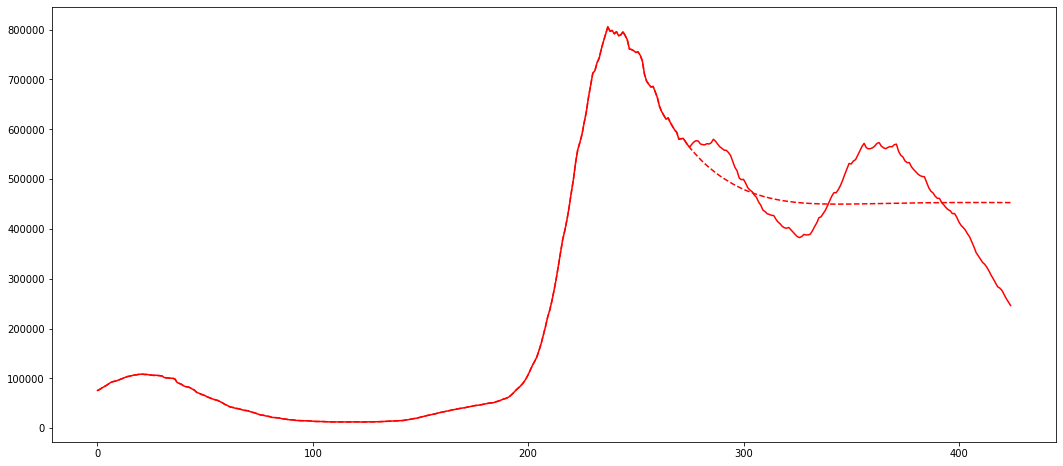

In [37]:
#daysToPredict = 180
sird.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

#note using the nonLinVars is trained on the whole data includinig the predicted days
sird_fd.predictMatch(suscept, infect, recov, dead, daysToPredict, linVars=linVars, nonLinVars=nonLinVars, graphVals=[0,1,0,0]);

#only train nonLinVars on the non predicted days only
sird_fd.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);